# Course: Natural Language Processing
## Week 10: Numerical Representations of texts

**Author:** Andrés Felipe Zapata Palacio  


In [ ]:
import nltk
import pandas as pd
import scipy
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from nltk.tokenize import TweetTokenizer

def tokenizeTweet(tweet):
  tokens = TweetTokenizer().tokenize(tweet)
  return tokens

In [ ]:
tweets = [
  'Chaerin unnie :)',
  'FNAF 4 dropped... looks like no sleep 4 me :)',
  '@ellekagaoan @chinmarquez Catch up once in a while :( @aditriphosphate @ErinMonzon',
  '@hesaffection are you the owner of the user @hesIovely ? :)',
  'all time looww :(',
  "@MalcolmInx lmao if I can catch up to the point where I can watch weekly then I'll be ok with that if I make it to 700 &amp; there's 800 eps :("
]

In [ ]:
def matrixToBagOfWords(data, counter, sorted=True):
  if type(data) == scipy.sparse.csr.csr_matrix:
    data = data.toarray()
  columns = counter.get_feature_names_out()
  dataFrame = pd.DataFrame( data=data , columns=columns )
  if sorted:
    dataFrame = dataFrame.sort_values(by=0, axis=1, ascending=False)
  return dataFrame

## Absolute Term Frequency

In [ ]:
counter = CountVectorizer(tokenizer = tokenizeTweet)
tf = counter.fit_transform(tweets)
matrixToBagOfWords(tf, counter)

,:),unnie,chaerin,&,that,looks,looww,make,me,no,...,be,can,catch,dropped,eps,fnaf,i,i'll,if,you
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,1,0,0,...,1,2,1,0,1,0,3,1,2,0


## Relative Term Frequency

In [ ]:
nWords = np.count_nonzero(tf.toarray(), axis=1)
nWords = np.expand_dims(nWords, 1)
relativeTf = tf.toarray() / nWords
matrixToBagOfWords(relativeTf, counter)

,:),unnie,chaerin,&,that,looks,looww,make,me,no,...,be,can,catch,dropped,eps,fnaf,i,i'll,if,you
0,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.100000,0.000000,0.000000,0.000000,0.000000,0.1,0.00,0.000000,0.1,0.1,...,0.000000,0.000000,0.000000,0.1,0.000000,0.1,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.090909,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.037037,0.037037,0.0,0.00,0.037037,0.0,0.0,...,0.037037,0.074074,0.037037,0.0,0.037037,0.0,0.111111,0.037037,0.074074,0.0


## Normalized Term Frequency

In [ ]:
counter = TfidfVectorizer(tokenizer = tokenizeTweet, use_idf = False, norm = 'l2')
tfNormalized = counter.fit_transform(tweets)
matrixToBagOfWords(tfNormalized, counter)

,:),unnie,chaerin,&,that,looks,looww,make,me,no,...,be,can,catch,dropped,eps,fnaf,i,i'll,if,you
0,0.57735,0.57735,0.57735,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
1,0.27735,0.00000,0.00000,0.000000,0.000000,0.27735,0.0,0.000000,0.27735,0.27735,...,0.000000,0.000000,0.000000,0.27735,0.000000,0.27735,0.000000,0.000000,0.000000,0.00000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.301511,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
3,0.27735,0.00000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.27735
4,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.5,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
5,0.00000,0.00000,0.00000,0.150756,0.150756,0.00000,0.0,0.150756,0.00000,0.00000,...,0.150756,0.301511,0.150756,0.00000,0.150756,0.00000,0.452267,0.150756,0.301511,0.00000


## TF-IDF (Term Frequency - Inverse Document Frequency)

In [ ]:
counter = TfidfVectorizer(tokenizer = tokenizeTweet)
tfIdf = counter.fit_transform(tweets)
matrixToBagOfWords(tfIdf, counter)

,unnie,chaerin,:),&,that,looks,looww,make,me,no,...,be,can,catch,dropped,eps,fnaf,i,i'll,if,you
0,0.635091,0.635091,0.439681,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.195978,0.000000,0.000000,0.283077,0.00000,0.000000,0.283077,0.283077,...,0.000000,0.000000,0.000000,0.283077,0.000000,0.283077,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.261622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.207155,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299222
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.53611,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.153399,0.153399,0.000000,0.00000,0.153399,0.000000,0.000000,...,0.153399,0.306798,0.125790,0.000000,0.153399,0.000000,0.460198,0.153399,0.306798,0.000000


## Vector Normalization

<Figure size 432x432 with 0 Axes>

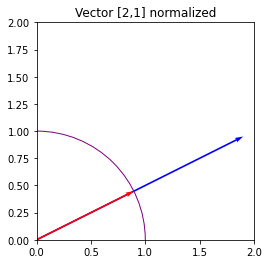

In [ ]:
#@title Vector normalization
#@markdown Run this cell to visualize the vector [2,1] and it's normalization


import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

figure, axes = plt.subplots()
Drawing_colored_circle = plt.Circle(( 0 , 0 ), 1 , fill=False, color='purple')

axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )

coordinates = np.array([[0.95,0.95/2],[0.8944/2,0.4472/2]])
o = np.array([[0, 0], [0, 0]])
plt.quiver(*o, coordinates[:, 0], coordinates[:, 1], color=['blue','red'], scale=1)

plt.title('Vector [2,1] normalized')
plt.ylim(0,2)
plt.xlim(0,2)

pass

<Figure size 432x432 with 0 Axes>

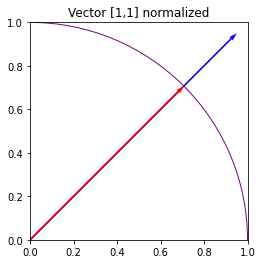

In [ ]:
#@title Vector normalization
#@markdown Run this cell to visualize the vector [1,1] and it's normalization


import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

figure, axes = plt.subplots()
Drawing_colored_circle = plt.Circle(( 0 , 0 ), 1 , fill=False, color='purple')

axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )

coordinates = np.array([[0.95,0.95], [1/np.sqrt(2), 1/np.sqrt(2)]])
o = np.array([[0, 0], [0, 0]])
plt.quiver(*o, coordinates[:, 0], coordinates[:, 1], color=['blue','red'], scale=1)

plt.title('Vector [1,1] normalized')
plt.ylim(0,1)
plt.xlim(0,1)

pass